In [2]:
### Data Reference: Automobile. (1987). UCI Machine Learning Repository.
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import LinearRegression

In [3]:
### Data Formatting Block
csv = pd.read_csv("/Users/jk/Desktop/A/Study/Data Analysis/Practice Folder/automobile.csv")
pd.set_option("display.max_rows", None)

df = pd.DataFrame(csv.replace("?", np.NaN))
df.dropna(inplace = True) # Drop the rows that contains NaN values for data wrangling
df["price"] = df["price"].astype(int) # Convert float values to int for linspace function

In [4]:
### Data Normalization Block
df["length"] = df["length"]/df["length"].max() # standarize scale of the value
df["height"] = df["height"]/df["height"].max() # standarize scale of the value
df["width"] = df["width"]/df["width"].max() # standarize scale of the value

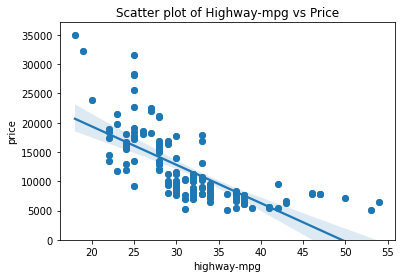

In [5]:
### Data Visualization Block
## Correlation between highway-mpg vs price which indicates that highway-mpg is a good predictor of the price
x = df[["highway-mpg"]]
y = df["price"]

plt.title("Scatter plot of Highway-mpg vs Price")
plt.xlabel("Highway-mpg")
plt.ylabel("Price")

sns.regplot(x = "highway-mpg", y = "price", data = df) # Plot data and a linear regression model fit
plt.ylim(0, ) # Get or set the y-limits of the current axes
plt.scatter(x, y)

In [6]:
### Data Validation Block
## R squared 
lm=LinearRegression()
lm.fit(x, y) # Train the model to get the coefficient
lm.intercept_
lm.coef_ # Caluclating the coefficient value between x and y (y=b0+b1x), this value represents how much of price (y) will be affected by variable of highway-mpg (x), in this data, approximately $655
lm.score(x, y) # R squared (percentage of variation between x and y) ex: R2 -> highway-mpg has 51.85% of variation on the price

y_data = {"predicted-price": lm.predict(x)}
y_df = pd.DataFrame(y_data)
df["predicted-price"] = y_df

df = df[['make', 'city-mpg', 'highway-mpg', 'price', 'predicted-price', 'symboling', 'aspiration', 'num-of-doors', # Rearranging columns
         'body-style', 'drive-wheels', 'horsepower', 'engine-location', 'wheel-base', 'length', 'width', 'height', 
         'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 
         'compression-ratio', 'peak-rpm', 'normalized-losses']]

display(f"b0 intercept value: {lm.intercept_}",
        f"b1 Coefficient value: {lm.coef_}",
        f"predicted price(yhat) value: {lm.predict(x)}",
        f"R2 value: {lm.score(x, y) * 100:.2f}%", df)


# # Multiple Linear Regression (MLR)
# # Extract the 4 predictor variables and store them in the variable z
# z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]

# # Train the model
# lm.fit(z, df[["price"]])
# yhat = lm.predict(x)



'b0 intercept value: 32468.309406001994'

'b1 Coefficient value: [-655.28135573]'

'predicted price(yhat) value: [12809.86873425 18052.11958005 16086.27551287 19362.6822915\n 13465.15008997 13465.15008997 14120.4314457  14120.4314457\n -2261.60244743  4291.21110982  4291.21110982  5601.77382127\n  7567.61788844 12809.86873425  7567.61788844  7567.61788844\n  7567.61788844 12809.86873425 16741.5568686  -2916.88380316\n  7567.61788844  4946.49246554 10188.74331134 10188.74331134\n 10188.74331134 10188.74331134 10844.02466707 10844.02466707\n 10844.02466707 10844.02466707 14120.4314457  12154.58737852\n 20017.96364722 12154.58737852  7567.61788844  7567.61788844\n  7567.61788844  7567.61788844 11499.3060228  11499.3060228\n 11499.3060228  11499.3060228  11499.3060228  14775.71280142\n 16086.27551287 16086.27551287 16086.27551287 16086.27551287\n 20673.24500295  5601.77382127  7567.61788844  7567.61788844\n 12809.86873425 12809.86873425 11499.3060228  11499.3060228\n 11499.3060228  12809.86873425 12809.86873425  8222.89924417\n  -295.75838026  8222.89924417  8222.8992441

'R2 value: 51.85%'

,make,city-mpg,highway-mpg,price,predicted-price,symboling,aspiration,num-of-doors,body-style,drive-wheels,...,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,peak-rpm,normalized-losses
3,audi,24,30,13950,19362.682291,2,std,four,sedan,fwd,...,2337,ohc,four,109,mpfi,3.19,3.40,10.00,5500.0,164.0
4,audi,18,22,17450,13465.150090,2,std,four,sedan,4wd,...,2824,ohc,five,136,mpfi,3.19,3.40,8.00,5500.0,164.0
6,audi,19,25,17710,14120.431446,1,std,four,sedan,fwd,...,2844,ohc,five,136,mpfi,3.19,3.40,8.50,5500.0,158.0
8,audi,17,20,23875,-2261.602447,1,turbo,four,sedan,fwd,...,3086,ohc,five,131,mpfi,3.13,3.40,8.30,5500.0,158.0
10,bmw,23,29,16430,4291.211110,2,std,two,sedan,rwd,...,2395,ohc,four,108,mpfi,3.50,2.80,8.80,5800.0,192.0
11,bmw,23,29,16925,5601.773821,0,std,four,sedan,rwd,...,2395,ohc,four,108,mpfi,3.50,2.80,8.80,5800.0,192.0
12,bmw,21,28,20970,7567.617888,0,std,two,sedan,rwd,...,2710,ohc,six,164,mpfi,3.31,3.19,9.00,4250.0,188.0
13,bmw,21,28,21105,12809.868734,0,std,four,sedan,rwd,...,2765,ohc,six,164,mpfi,3.31,3.19,9.00,4250.0,188.0
18,chevrolet,47,53,5151,16741.556869,2,std,two,hatchback,fwd,...,1488,l,three,61,2bbl,2.91,3.03,9.50,5100.0,121.0
19,chevrolet,38,43,6295,-2916.883803,1,std,two,hatchback,fwd,...,1874,ohc,four,90,2bbl,3.03,3.11,9.60,5400.0,98.0
